In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# OPEN SSL SERVER

In [2]:
def read_data(path):

    df = pd.read_csv(path)
    df = df.sort_values(by=["distance", "algorithm"])
    df = df.drop(columns=["date","duration"])
    return df

server_df = read_data("moore/data/WP/OPEN_SSL_SERVER.csv")
client_df = read_data("moore/data/WP/OPEN_SSL_CLIENT.csv")

server_df.head()

,algorithm,id,num_states,num_alphabet,eq_count,mq_count,distance
21,mealy/TTT,/Nordsec16/server_102.dot,13,8,6,153,14
20,mealy/dynamicTTT,/Nordsec16/server_102.dot,13,8,1,178,14
15,mealy/TTT,/Nordsec16/server_100.dot,19,8,7,228,31
14,mealy/dynamicTTT,/Nordsec16/server_100.dot,19,8,1,250,31
11,mealy/TTT,/Nordsec16/server_098u.dot,22,8,10,287,67


In [3]:

def melt_data(df):
    df2 = df.melt(
            id_vars=["algorithm", "id", "num_states", "num_alphabet", "distance"],
            var_name="query_type",
            value_name="query_count")
    df2["normalized_query_count"]  = df2["query_count"] / df2["num_states"]
    return df2

melted_server_df = melt_data(server_df)
melted_client_df = melt_data(client_df)
melted_server_df.head()

,algorithm,id,num_states,num_alphabet,distance,query_type,query_count,normalized_query_count
0,mealy/TTT,/Nordsec16/server_102.dot,13,8,14,eq_count,6,0.461538
1,mealy/dynamicTTT,/Nordsec16/server_102.dot,13,8,14,eq_count,1,0.076923
2,mealy/TTT,/Nordsec16/server_100.dot,19,8,31,eq_count,7,0.368421
3,mealy/dynamicTTT,/Nordsec16/server_100.dot,19,8,31,eq_count,1,0.052632
4,mealy/TTT,/Nordsec16/server_098u.dot,22,8,67,eq_count,10,0.454545


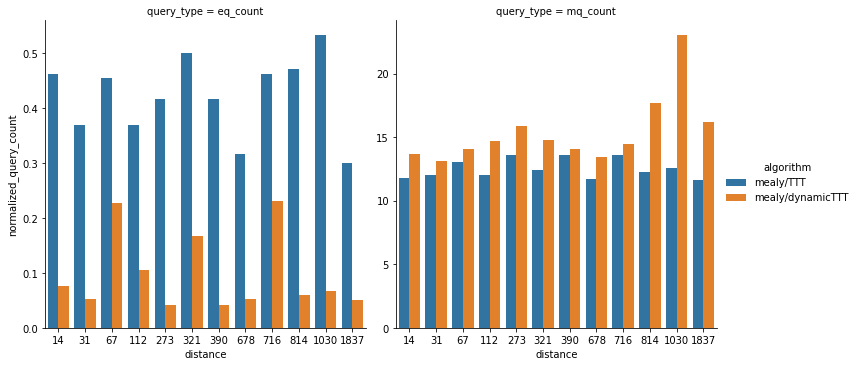

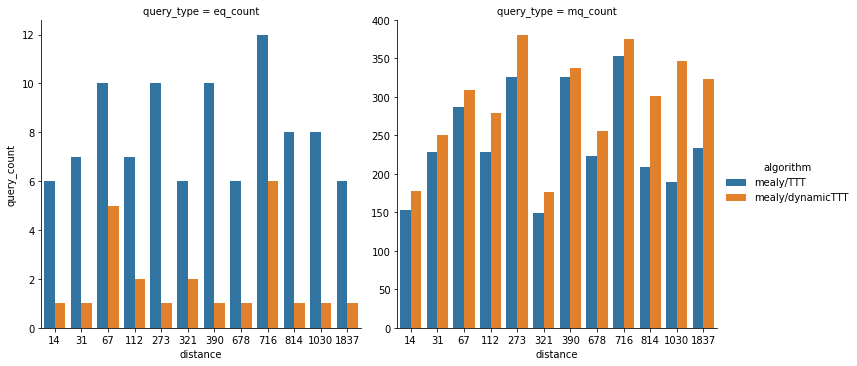

In [4]:
def plot_query_count(melted_df):
    for col in ["normalized_query_count", "query_count"]:
        sns.catplot(kind="bar", data=melted_df, col="query_type", hue="algorithm", x="distance", y=col, sharey=False)
        plt.show()
        
plot_query_count(melted_server_df)        

In [5]:
def get_related_df(df):
    related_df = pd.DataFrame()

    TTT_df = df[df["algorithm"] =="mealy/TTT"].set_index("id")
    dTTT_df = df[df["algorithm"] == "mealy/dynamicTTT"].set_index("id")

    related_df[["num_states","num_alphabet","distance"]]=dTTT_df[["num_states","num_alphabet","distance"]]

    related_df["related_eq_count"] = dTTT_df["eq_count"]/TTT_df["eq_count"]
    related_df["related_mq_count"] = dTTT_df["mq_count"]/TTT_df["mq_count"]


    related_df["diff_eq_count"] = dTTT_df["eq_count"]-TTT_df["eq_count"]
    related_df["diff_mq_count"] = dTTT_df["mq_count"]- TTT_df["mq_count"]

    related_df[["num_states","num_alphabet","distance"]]=dTTT_df[["num_states","num_alphabet","distance"]]


    related_df["normalized_diff_eq_count"] = related_df["diff_eq_count"]/ related_df["num_states"]
    related_df["normalized_diff_mq_count"] = related_df["diff_mq_count"]/ related_df["num_states"]



    related_df["related_diff_eq_count"] =  related_df["related_eq_count"] - 1
    related_df["related_diff_mq_count"] =  related_df["related_mq_count"] - 1

    related_df = related_df.sort_values(by="id")
    related_df["state_distance"] = related_df["num_states"].diff().fillna(3)
    related_df.dropna(inplace=True)
    return related_df
    
related_server_df = get_related_df(server_df)
related_client_df = get_related_df(client_df)
related_server_df

,num_states,num_alphabet,distance,related_eq_count,related_mq_count,diff_eq_count,diff_mq_count,normalized_diff_eq_count,normalized_diff_mq_count,related_diff_eq_count,related_diff_mq_count,state_distance
id,,,,,,,,,,,,
/Nordsec16/server_097c.dot,24,8,273,0.100000,1.168712,-9,55,-0.375000,2.291667,-0.900000,0.168712,3.0
/Nordsec16/server_097e.dot,24,8,390,0.100000,1.033742,-9,11,-0.375000,0.458333,-0.900000,0.033742,0.0
/Nordsec16/server_098l.dot,20,8,1837,0.166667,1.386266,-5,90,-0.250000,4.500000,-0.833333,0.386266,-4.0
/Nordsec16/server_098m.dot,19,8,112,0.285714,1.223684,-5,51,-0.263158,2.684211,-0.714286,0.223684,-1.0
/Nordsec16/server_098s.dot,19,8,678,0.166667,1.147982,-5,33,-0.263158,1.736842,-0.833333,0.147982,0.0
/Nordsec16/server_098u.dot,22,8,67,0.500000,1.076655,-5,22,-0.227273,1.000000,-0.500000,0.076655,3.0
/Nordsec16/server_098za.dot,17,8,814,0.125000,1.440191,-7,92,-0.411765,5.411765,-0.875000,0.440191,-5.0
/Nordsec16/server_100.dot,19,8,31,0.142857,1.096491,-6,22,-0.315789,1.157895,-0.857143,0.096491,2.0
/Nordsec16/server_101.dot,26,8,716,0.500000,1.062323,-6,22,-0.230769,0.846154,-0.500000,0.062323,7.0


In [10]:
def get_melted_related_df(related_df):
    related_df2 = pd.DataFrame()

    for index, row in related_df.iterrows():
        related_df2 = related_df2.append(pd.Series({
            "query_type" : "MQ",
            "related_count" : row["related_mq_count"],
            "diff_count" : row["diff_mq_count"],
            "normalized_diff_count": row["normalized_diff_mq_count"],
            "related_diff_count": row["related_diff_mq_count"],
            "num_states" : row["num_states"],
            "num_alphabet": row["num_alphabet"],
            "distance" : row["distance"],
            "id": index,   
            "state_distance": row["state_distance"]
        }), ignore_index=True)

        related_df2 = related_df2.append(pd.Series({
            "query_type" : "EQ",
            "related_count" : row["related_eq_count"],
            "diff_count" : row["diff_eq_count"],
            "normalized_diff_count": row["normalized_diff_eq_count"],
            "related_diff_count": row["related_diff_eq_count"],
            "num_states" : row["num_states"],
            "num_alphabet": row["num_alphabet"],
            "distance" : row["distance"],
            "id": index, 
            "state_distance": row["state_distance"]
        }), ignore_index=True)

        related_df2["norm_state_distance"] = (related_df2["state_distance"] / related_df2["num_states"]).round(2)
    return related_df2

melted_related_server_df = get_melted_related_df(related_server_df)
melted_related_client_df = get_melted_related_df(related_client_df)
melted_related_server_df

,diff_count,distance,id,normalized_diff_count,num_alphabet,num_states,query_type,related_count,related_diff_count,state_distance,norm_state_distance
0,55.0,273.0,/Nordsec16/server_097c.dot,2.291667,8.0,24.0,MQ,1.168712,0.168712,3.0,0.12
1,-9.0,273.0,/Nordsec16/server_097c.dot,-0.375000,8.0,24.0,EQ,0.100000,-0.900000,3.0,0.12
2,11.0,390.0,/Nordsec16/server_097e.dot,0.458333,8.0,24.0,MQ,1.033742,0.033742,0.0,0.00
3,-9.0,390.0,/Nordsec16/server_097e.dot,-0.375000,8.0,24.0,EQ,0.100000,-0.900000,0.0,0.00
4,90.0,1837.0,/Nordsec16/server_098l.dot,4.500000,8.0,20.0,MQ,1.386266,0.386266,-4.0,-0.20
5,-5.0,1837.0,/Nordsec16/server_098l.dot,-0.250000,8.0,20.0,EQ,0.166667,-0.833333,-4.0,-0.20
6,51.0,112.0,/Nordsec16/server_098m.dot,2.684211,8.0,19.0,MQ,1.223684,0.223684,-1.0,-0.05
7,-5.0,112.0,/Nordsec16/server_098m.dot,-0.263158,8.0,19.0,EQ,0.285714,-0.714286,-1.0,-0.05
8,33.0,678.0,/Nordsec16/server_098s.dot,1.736842,8.0,19.0,MQ,1.147982,0.147982,0.0,0.00
9,-5.0,678.0,/Nordsec16/server_098s.dot,-0.263158,8.0,19.0,EQ,0.166667,-0.833333,0.0,0.00


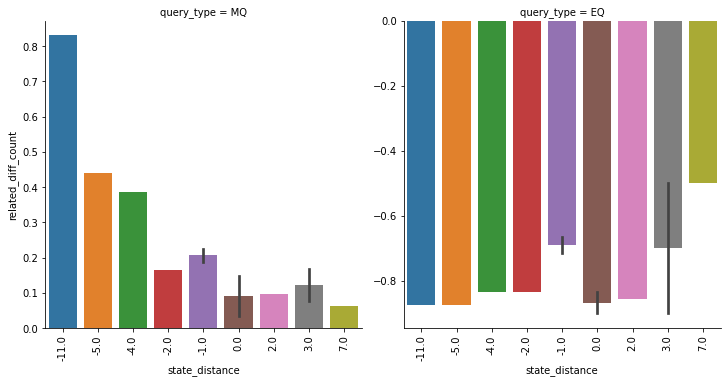

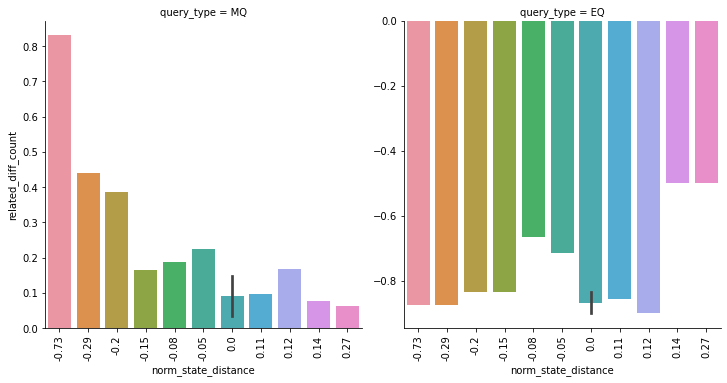

In [7]:
def plot_diff_state_distance(melted_related_df):
    for x in ['state_distance', 'norm_state_distance']:
        ax = sns.catplot(kind="bar", data=melted_related_df, x=x, y="related_diff_count", col="query_type", sharey=False)
        for axes in ax.axes.flat:
            _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
        plt.show()
        
plot_diff_state_distance(melted_related_server_df)

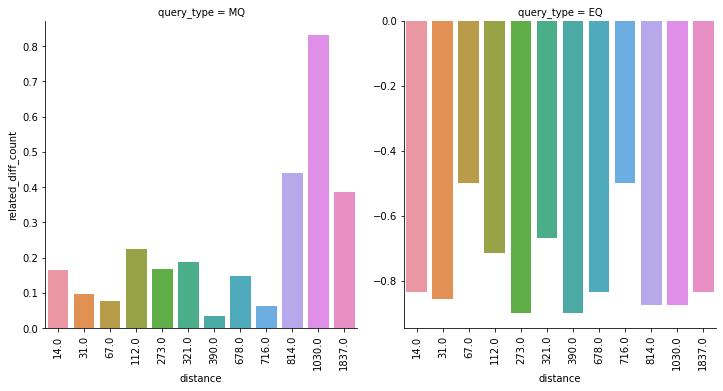

In [8]:
def plot_diff_date_distance(melted_related_df):
    ax = sns.catplot(kind="bar", data=melted_related_df, x="distance", y="related_diff_count", col="query_type", sharey=False)
    for axes in ax.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    plt.show()
    
plot_diff_date_distance(melted_related_server_df)